In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.interpolate import interp1d
import scipy.constants as sconst
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Times New Roman",
  "font.size": 10,
  "axes.labelsize": 10,
  "xtick.labelsize": 10,
  "ytick.labelsize": 10,
  "legend.fontsize": 8,
})
plt.style.use(['science', 'ieee', 'grid'])
from IPython.display import display
from sympy.printing import latex

4.1 Leerlaufversuch

In [2]:
n = np.array([5000, 4000, 3000, 2000, 1000])
EMK = np.array([11.1, 8.8, 6.6, 4.43, 2.20])
U_A = np.array([11.94, 9.61, 7.3, 5.0, 2.68])
I_A = np.array([0.42, 0.39, 0.357, 0.327, 0.276])

c_phi = U_A/n

display(np.mean(c_phi))

data = []
for i in range(len(n)):
    data.append([n[i], EMK[i], U_A[i], I_A[i], c_phi[i]])
# pd.DataFame(data, columns=['$nrame(data, columns=['$n$', '$EMK$', '$U_A$', '$I_A$', '$c\cdot\\varphi$']).to_latex('tables/Leerlaufversuch.tex', index=False)
# pd.DataFr$', '$EMK$', '$U_A$', '$I_A$', '$c\cdot\\varphi$']).to_excel('excel/Leerlaufversuch.xlsx', index=False)
pd.DataFrame(data, columns=['$n$', '$EMK$', '$U_A$', '$I_A$', '$c\cdot\\varphi$'])

0.0024807666666666664

/tmp/ipykernel_522450/3811716707.py:13: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  pd.DataFrame(data, columns=['$n$', '$EMK$', '$U_A$', '$I_A$', '$c\cdot\\varphi$']).to_latex('tables/Leerlaufversuch.tex', index=False)


,$n$,$EMK$,$U_A$,$I_A$,$c\cdot\varphi$
0,5000,11.10,11.94,0.420,0.002388
1,4000,8.80,9.61,0.390,0.002402
2,3000,6.60,7.30,0.357,0.002433
3,2000,4.43,5.00,0.327,0.002500
4,1000,2.20,2.68,0.276,0.002680


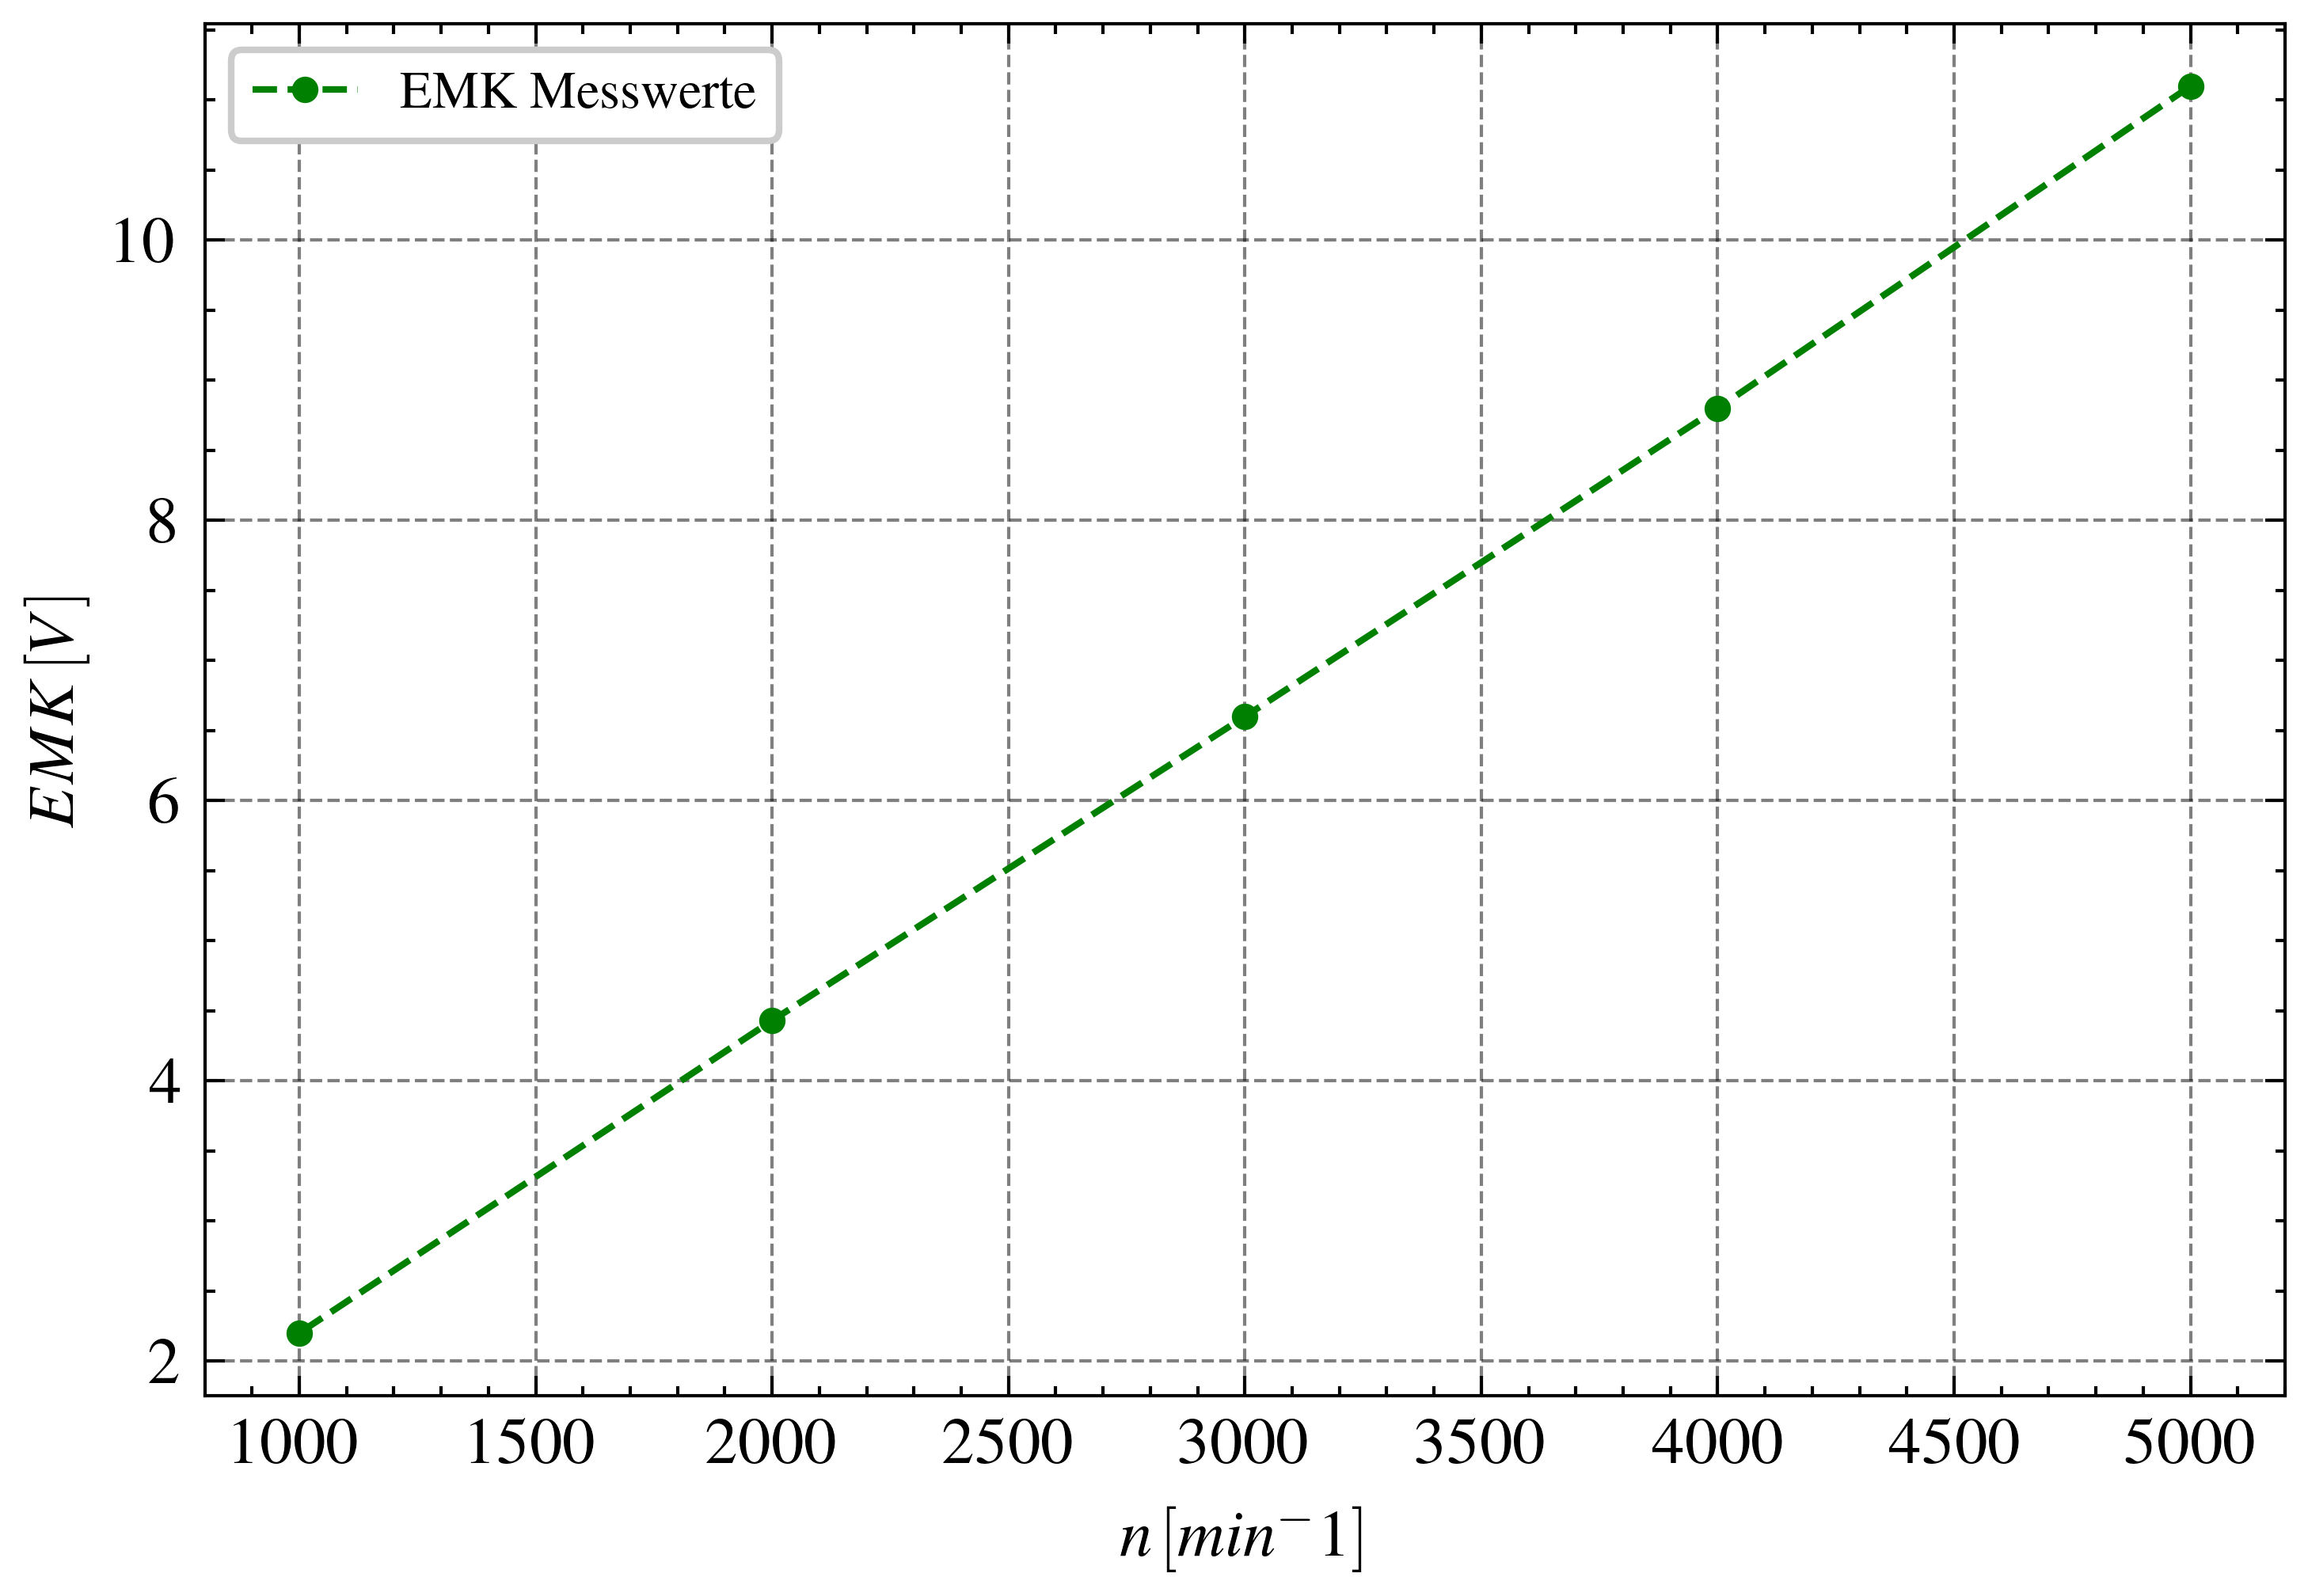

In [3]:
fig, ax = plt.subplots(figsize=(5, 3.5))
ax.plot(n, EMK, "g.--", label="EMK Messwerte")
ax.set_xlabel("$n\, [min^-1]$")
ax.set_ylabel("$EMK\, [V]$")

ax.legend()
plt.tight_layout()
# plt.savefig("plots/4.1_Leerlaufversuch.pdf")

4.3 Belasteter Motor

U_A = 9V

In [4]:
R_Last_bz = [
    "All Switches Open",
    "S1",
    "S2",
    "S1+S2",
    "S1+S2+S3",
    "S1+S2+S3+S4",
    "S1+S2+S3+S4+S5",
]
R_Last = np.array([np.Infinity, 20, 10, 6.67, 4, 2.86, 2.22])
n = np.array([3766, 3548, 3385, 3261, 3080, 2962, 2868])
U_A = np.ones(len(R_Last_bz))*9
I_A = np.array([0.386, 0.724, 0.958, 1.146, 1.4, 1.565, 1.68])
W = np.array([8.08, 9.29, 10.75, 11.53, 13.75, 15.15, 16.7])
M = W*sconst.g*0.1

data = []
for i in range(len(R_Last_bz)):
    data.append([R_Last_bz[i], R_Last[i], n[i], U_A[i], I_A[i], W[i], M[i]])

# pd.DataFrame(data, columns=["Switches of Resistors", "$R_{Last}$", "$n\, [min^-1]$", "$U_A\,[V]$", "$I_A\,[A]$", "Weight $[g]$", "$M\,[m\,Nm]$"]).to_latex("tables/4.3_Belasteter_Motor_UA9V.tex", index=False)
# pd.DataFrame(data, columns=["Switches of Resistors", "$R_{Last}$", "$n\, [min^-1]$", "$U_A\,[V]$", "$I_A\,[A]$", "Weight $[g]$", "$M\,[m\,Nm]$"]).to_excel("excel/4.3_Belasteter_Motor_UA9V.xlsx", index=False)
pd.DataFrame(data, columns=["Switches of Resistors", "$R_{Last}$", "$n\, [min^-1]$", "$U_A\,[V]$", "$I_A\,[A]$", "Weight $[g]$", "$M\,[m\,Nm]$"])


,Switches of Resistors,$R_{Last}$,"$n\, [min^-1]$","$U_A\,[V]$","$I_A\,[A]$",Weight $[g]$,"$M\,[m\,Nm]$"
0,All Switches Open,inf,3766,9.0,0.386,8.08,7.923773
1,S1,20.00,3548,9.0,0.724,9.29,9.110378
2,S2,10.00,3385,9.0,0.958,10.75,10.542149
3,S1+S2,6.67,3261,9.0,1.146,11.53,11.307067
4,S1+S2+S3,4.00,3080,9.0,1.400,13.75,13.484144
5,S1+S2+S3+S4,2.86,2962,9.0,1.565,15.15,14.857075
6,S1+S2+S3+S4+S5,2.22,2868,9.0,1.680,16.70,16.377105


U_A=12V

In [5]:
n_12 = np.array([5100, 4760, 4563, 4390, 4150, 3980, 3910])
U_A_12 = np.ones(len(R_Last_bz)) * 12
I_A_12 = np.array([0.41, 0.87, 1.2, 1.44, 178, 2.02, 2.2])
W_12 = np.array([8.06, 8.66, 9.22, 10.15, 12.48, 14.60, 16.93])
M_12 = W_12 * sconst.g * 0.1


data_12 = []
for i in range(len(R_Last_bz)):
    data_12.append([R_Last_bz[i], R_Last[i], n_12[i], U_A_12[i], I_A_12[i], W_12[i], M_12[i]])

# pd.DataFrame(data_12, columns=["Switches of Resistors", "$R_{Last}$", "$n\, [min^-1]$", "$U_A\,[V]$", "$I_A\,[A]$", "Weight $[g]$", "$M\,[m\,Nm]$"]).to_latex("tables/4.3_Belasteter_Motor_UA12V.tex", index=False)
# pd.DataFrame(data_12, columns=["Switches of Resistors", "$R_{Last}$", "$n\, [min^-1]$", "$U_A\,[V]$", "$I_A\,[A]$", "Weight $[g]$", "$M\,[m\,Nm]$"]).to_excel("excel/4.3_Belasteter_Motor_UA12V.xlsx", index=False)
pd.DataFrame(data_12, columns=[ "Switches of Resistors", "$R_{Last}$", "$n\, [min^-1]$", "$U_A\,[V]$", "$I_A\,[A]$", "Weight $[g]$", "$M\,[m\,Nm]$", ])


,Switches of Resistors,$R_{Last}$,"$n\, [min^-1]$","$U_A\,[V]$","$I_A\,[A]$",Weight $[g]$,"$M\,[m\,Nm]$"
0,All Switches Open,inf,5100,12.0,0.41,8.06,7.904160
1,S1,20.00,4760,12.0,0.87,8.66,8.492559
2,S2,10.00,4563,12.0,1.20,9.22,9.041731
3,S1+S2,6.67,4390,12.0,1.44,10.15,9.953750
4,S1+S2+S3,4.00,4150,12.0,178.00,12.48,12.238699
5,S1+S2+S3+S4,2.86,3980,12.0,2.02,14.60,14.317709
6,S1+S2+S3+S4+S5,2.22,3910,12.0,2.20,16.93,16.602658


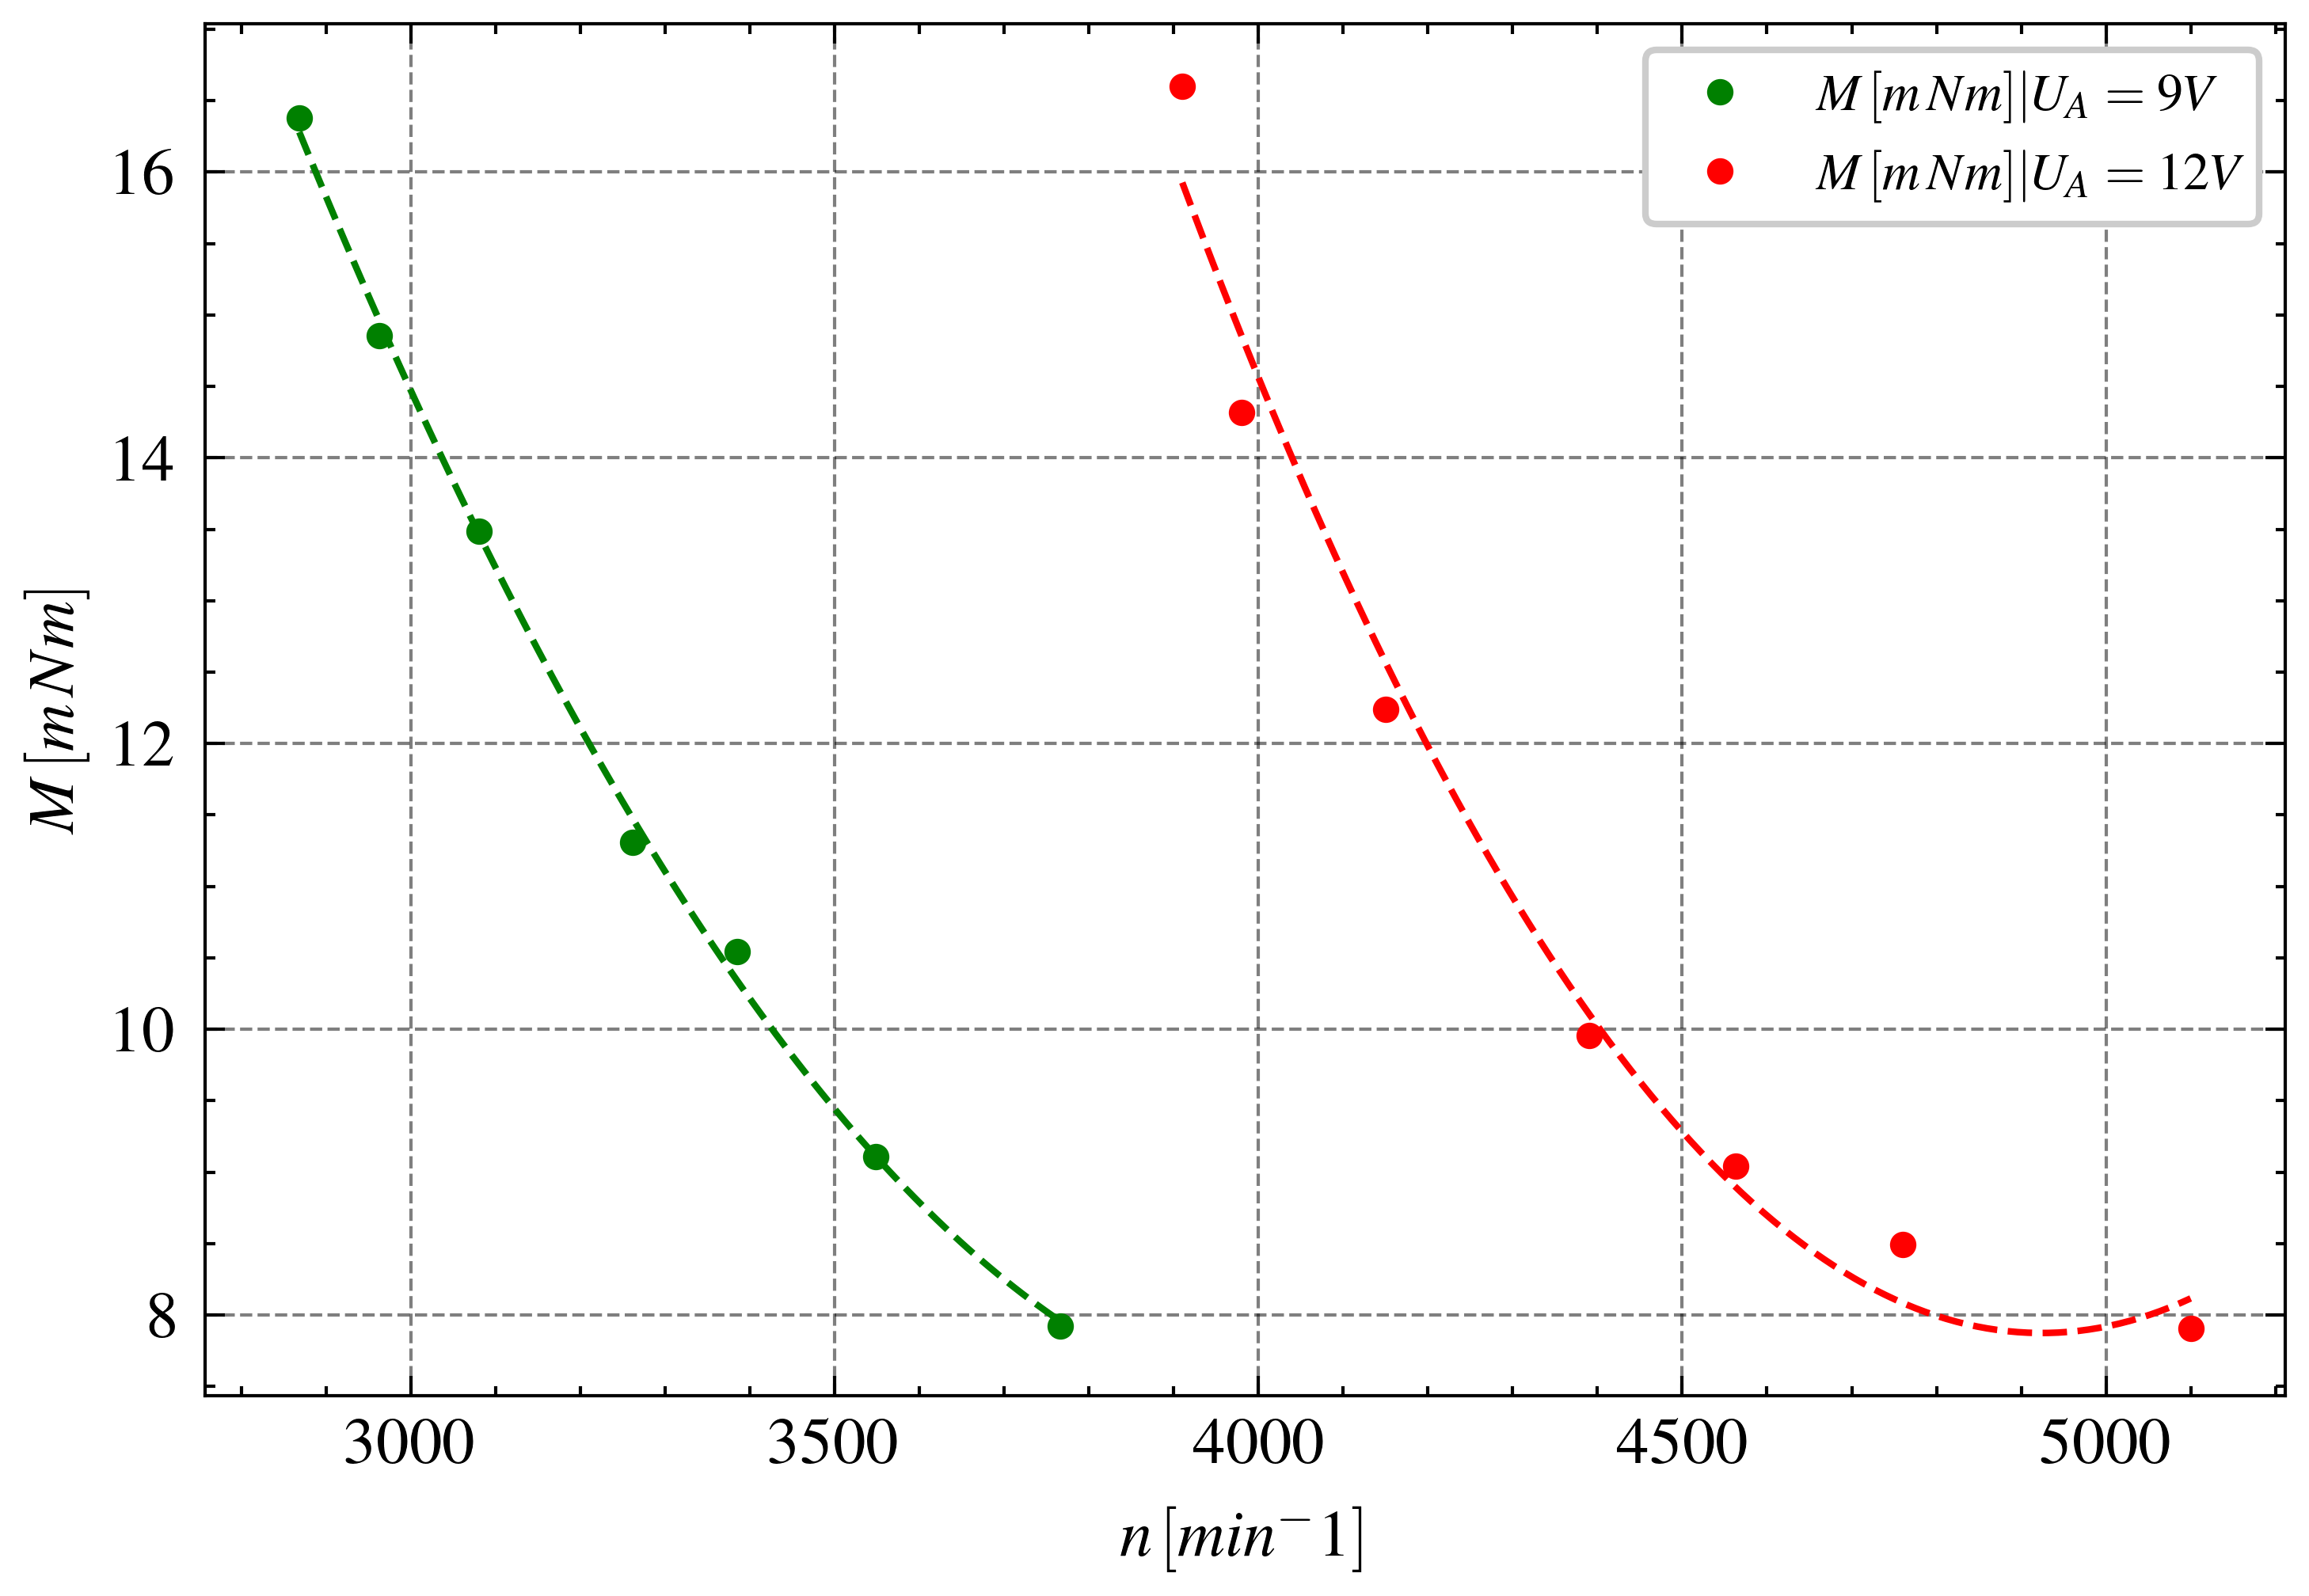

In [6]:
u9_xs = np.linspace(n.min(), n.max(), 100)
u12_xs = np.linspace(n_12.min(), n_12.max(), 100)
model_9 = np.polyfit(n, M, 2)
model_12 = np.polyfit(n_12, M_12, 2)
y_prediction = np.polyval(model_9, u9_xs)
y_prediction_12 = np.polyval(model_12, u12_xs)

fig, ax = plt.subplots(figsize=(5, 3.5))
ax.plot(n, M, "g.", label="$M\,[m\,Nm]|U_A=9V$")
ax.plot(n_12, M_12, "r.", label="$M\,[m\,Nm] | U_A=12V$")
ax.plot(u9_xs, y_prediction, "g--")
ax.plot(u12_xs, y_prediction_12, "r--")
ax.set_xlabel("$n\, [min^-1]$")
ax.set_ylabel("$M\,[m\,Nm]$")

ax.legend()
plt.tight_layout()
# plt.savefig("plots/4.3_Belasteter_Motor_UA9V_12V.pdf", dpi=300)